In [59]:
# Dependecies

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import json
from geopy.geocoders import Nominatim
from configure import geopy_api_key
import hvplot.pandas


In [60]:
# The path to CSV file
file_path = Path ('national_parks_total.csv')

# Read the CSV file
df = pd.read_csv(file_path)
df.head()

,State,Park,Number of visitors per year,Longitude,Latitude
0,Maine,Acadia NP,3970260,-68.0493,44.4540
1,Utah,Arches NP,1460652,-109.5650,38.7700
2,South Dakota,Badlands NP,1006809,-102.4343,43.6504
3,Texas,Big Bend NP,514107,-103.2432,29.3816
4,Florida,Biscayne NP,701023,-80.2619,25.4420


In [61]:
# Convert 'Number of visitors per year' column to numeric data type
df['Number of visitors per year'] = pd.to_numeric(df['Number of visitors per year'], errors='coerce')

# Calculate the total number of visitors per year for all parks
total_visitors_all_parks = df['Number of visitors per year'].sum()

# Calculate the total number of visitors per year per state
total_visitors_per_state = df.groupby('State')['Number of visitors per year'].sum()

# Print the total number of visitors per year for all parks
print("Total number of visitors per year for all parks is", total_visitors_all_parks)

Total number of visitors per year for all parks is 88662187


In [62]:
# Find the state with the maximum and minimum number of visitors
state_max_visitors = total_visitors_per_state.idxmax()
state_min_visitors = total_visitors_per_state.idxmin()

# Find the number of visitors for the state with the maximum and minimum number of visitors
state_max_visitors_count = total_visitors_per_state[state_max_visitors]
state_min_visitors_count = total_visitors_per_state[state_min_visitors]

# Print the state with the maximum and minimum number of visitors and the corresponding visitor count
print("State with the maximum number of visitors is", state_max_visitors, "with", state_max_visitors_count, "visitors per year.")
print("State with the minimum number of visitors is", state_min_visitors, "with", state_min_visitors_count, "visitors per year.")

State with the maximum number of visitors is California with 11131545 visitors per year.
State with the minimum number of visitors is American Samoa with 1887 visitors per year.


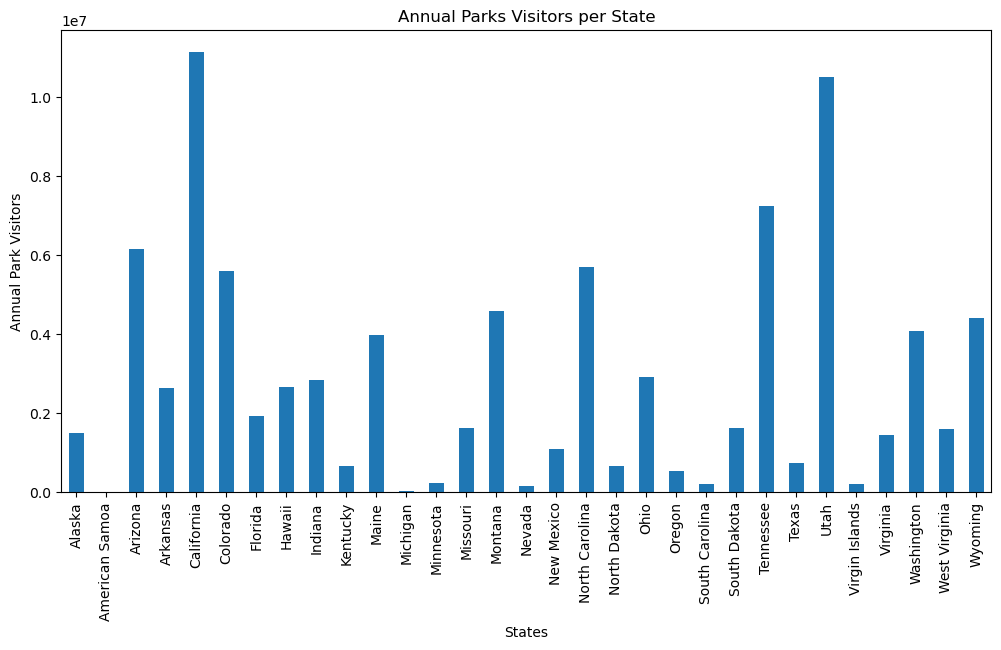

In [64]:
# Plot the relationship between the total number of visitors per year in each state
fig, ax = plt.subplots(figsize=(12, 6))
total_visitors_per_state.plot(kind='bar', ax=ax)
ax.set_xlabel('States')
ax.set_ylabel('Annual Park Visitors')
ax.set_title('Annual Parks Visitors per State')

# Save the plot as a PNG file
plt.savefig('Visuals/Annual Parks Visitors per State', bbox_inches='tight')

plt.show()


In [65]:
# Calculate the total number of visitors per year per park
total_visitors_per_park = df.groupby('Park')['Number of visitors per year'].sum()

# Find the park with the maximum and minimum number of visitors
park_max_visitors = total_visitors_per_park.idxmax()
park_min_visitors = total_visitors_per_park.idxmin()

# Find the number of visitors for the park with the maximum and minimum number of visitors
park_max_visitors_count = total_visitors_per_park[park_max_visitors]
park_min_visitors_count = total_visitors_per_park[park_min_visitors]

# Print the park with the maximum and minimum number of visitors and the corresponding visitor count
print("Park with the maximum number of visitors is", park_max_visitors, "with", park_max_visitors_count, "visitors per year.")
print("Park with the minimum number of visitors is", park_min_visitors, "with", park_min_visitors_count, "visitors per year.")

Park with the maximum number of visitors is Great Smoky Mountains NP with 12937634 visitors per year.
Park with the minimum number of visitors is National Park of American Samoa with 1887 visitors per year.


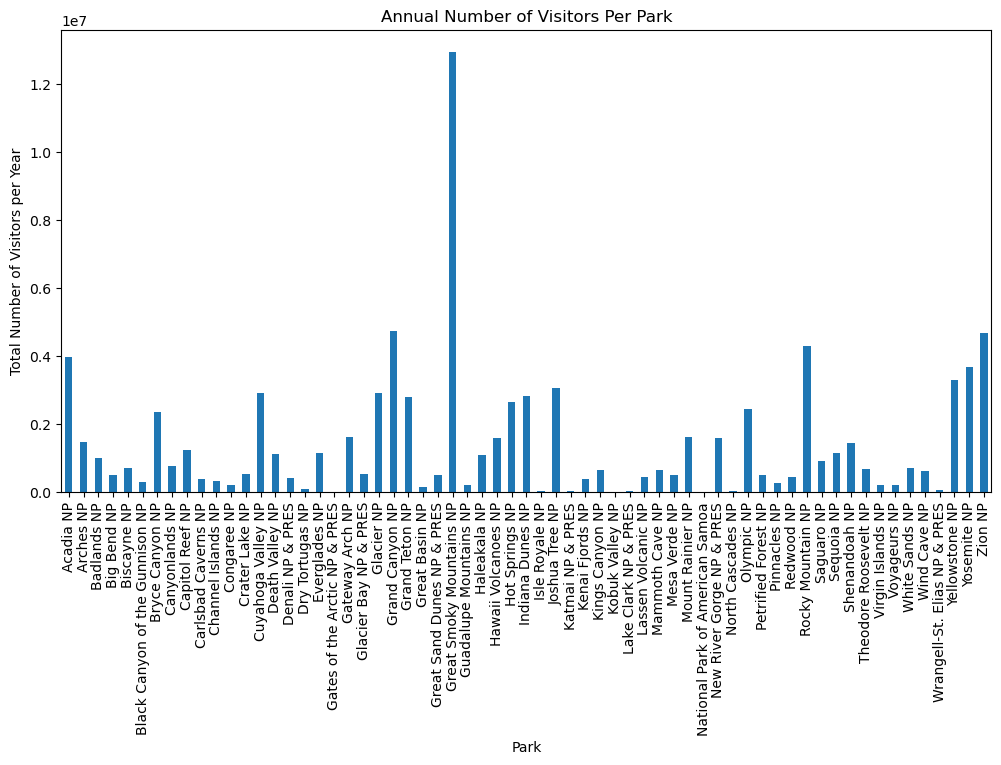

In [72]:
# Plot the relationship between the total number of visitors per year in each park
fig, ax = plt.subplots(figsize=(12, 6))
total_visitors_per_park.plot(kind='bar', ax=ax)
ax.set_xlabel('Park')
ax.set_ylabel('Total Number of Visitors per Year')
ax.set_title('Annual Number of Visitors Per Park')

# Save the plot as a PNG file
plt.savefig('Visuals/Annual Number of Visitors Per Park', bbox_inches='tight')

plt.show()

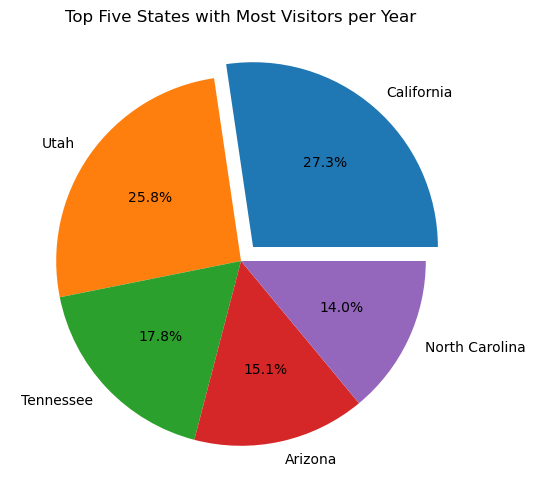

In [67]:
# Calculate the total number of visitors per year per state
total_visitors_per_state = df.groupby('State')['Number of visitors per year'].sum()

# Get the top five states with the most visitors per year
top_five_states = total_visitors_per_state.nlargest(5)

# Set the explode values for the pie charts
explode_states = [0.1, 0, 0, 0, 0]  # Explode the first slice (largest) by 0.1
explode_parks = [0.1, 0, 0, 0, 0]   # Explode the first slice (largest) by 0.1

# Create a pie chart for the top five states
plt.figure(figsize=(8, 6))
plt.pie(top_five_states, labels=top_five_states.index, autopct='%1.1f%%', explode=explode_states)
plt.title('Top Five States with Most Visitors per Year')

# Save the plot as a PNG file
plt.savefig('Visuals/Top Five States with Most Visitors per Year', bbox_inches='tight')

plt.show()

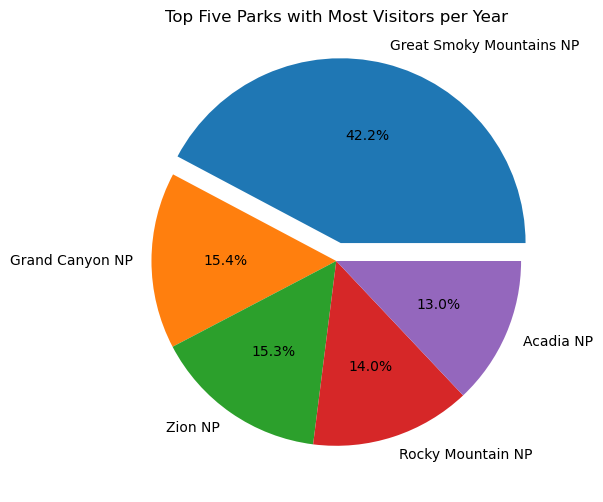

In [68]:
# Calculate the total number of visitors per year per park
total_visitors_per_park = df.groupby('Park')['Number of visitors per year'].sum()

# Get the top five parks with the most visitors per year
top_five_parks = total_visitors_per_park.nlargest(5)

# Set the explode values for the pie charts
explode_states = [0.1, 0, 0, 0, 0]  # Explode the first slice (largest) by 0.1
explode_parks = [0.1, 0, 0, 0, 0]   # Explode the first slice (largest) by 0.1

# Create a pie chart for the top five parks
plt.figure(figsize=(8, 6))
plt.pie(top_five_parks, labels=top_five_parks.index, autopct='%1.1f%%', explode=explode_parks)
plt.title('Top Five Parks with Most Visitors per Year')

# Save the plot as a PNG file
plt.savefig('Visuals/Top Five Parks with Most Visitors per Year', bbox_inches='tight')

plt.show()

In [69]:
# Convert "Latitude" and "Longitude" columns to numeric data types
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

# Calculate the size of points based on 'Visitors Per Year' values
point_size = (df["Number of visitors per year"] / df["Number of visitors per year"].max()) * 400

# Configure the map plot for all parks
map_plot = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size=point_size,
    line_color="black",  # Add black edge lines to the dots
    line_width=1.5  # Adjust the line width as needed
).opts(
    title="Annual Visitors per State",
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)

# Display the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (_size)

In [70]:
# Convert "Latitude" and "Longitude" columns to numeric data types
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

# Sort the DataFrame by 'Visitors Per Year' column in descending order
sorted_df = df.sort_values(by='Number of visitors per year', ascending=False)

# Select the top 10 records
top_20_results = sorted_df.head(20)

# Calculate the size of points based on 'Visitors Per Year' values
point_size = (top_20_results["Number of visitors per year"] / top_20_results["Number of visitors per year"].max()) * 800

# Calculate the color of points based on 'Visitors Per Year' values
point_color = top_20_results["Number of visitors per year"]

# Configure the map plot for the top 20 records
map_plot = top_20_results.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size=point_size,
    color=point_color,  # Use the 'Visitors Per Year' values for color
    cmap="viridis",  # Choose a color map, such as 'viridis'
    line_color="black",  # Add black edge lines to the dots
    line_width=1.5  # Adjust the line width as needed
).opts(
    title="Top 20 National Parks with Most Visitor Per Year",
    width=1000,  # Set the width of the plot
    height=600  # Set the height of the plot
)

# Display the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (_color,_size)